In [1]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入逻辑回归模型函数
from sklearn  import svm

In [2]:
## Demo演示LogisticRegression分类

## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

## 调用SVC模型 （支持向量机分类）
svc = svm.SVC(kernel='linear')

## 用SVM模型拟合构造的数据集
svc = svc.fit(x_fearures, y_label) 

In [3]:
## 查看其对应模型的w
print('the weight of Logistic Regression:',svc.coef_)

## 查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',svc.intercept_)

the weight of Logistic Regression: [[0.33364706 0.33270588]]
the intercept(w0) of Logistic Regression: [-0.00031373]


In [4]:
## 模型预测
y_train_pred = svc.predict(x_fearures)
print('The predction result:',y_train_pred)

The predction result: [0 0 0 1 1 1]


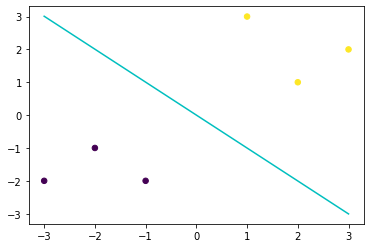

In [5]:
# 最佳函数
x_range = np.linspace(-3, 3)

#结合SVM的距离公式
w = svc.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_range - (svc.intercept_[0]) / w[1]
'''案例比较简单，以严格分类作为案例讲述，效果自然比较好'''
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=30, cmap='viridis')
plt.plot(x_range, y_3, '-c')
plt.show()

### 另一个案例

/Users/lijialin/opt/anaconda3/envs/mlenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


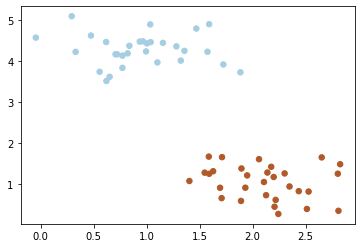

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

# 画图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

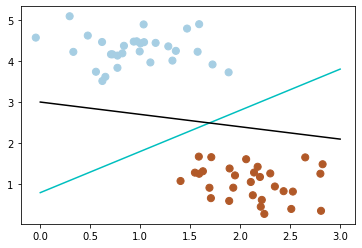

In [7]:
### 画散点图及对应分类器
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

x_fit = np.linspace(0, 3)
# 画函数
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
y_2 = -0.3 * x_fit + 3
plt.plot(x_fit, y_2, '-k')

#### 问：两个分类器哪个更好？
为了判断好坏，我们需要引入一个准则：好的分类器不仅仅是能够很好的分开已有的数据集，还能对未知数据集进行两个的划分。**即距离分类器越远越能说明类别区分明确—最大间隔。**

假设有一个新的数据代入（3,2.8）

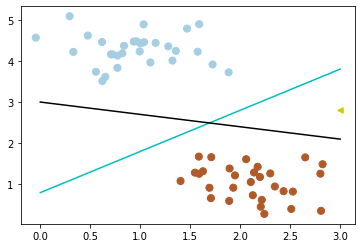

In [8]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.scatter([3], [2.8], c='#cccc00', marker='<', s=30, cmap=plt.cm.Paired)

x_fit = np.linspace(0, 3)

# 画函数
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
y_2 = -0.3 * x_fit + 3
plt.plot(x_fit, y_2, '-k')

可以看到，上述的黑线就不满足分类的情况了，因为在已知的数据集中，黑色比蓝色离最大间隔更遥远。

加粗对应线段，查看对应的间隔。

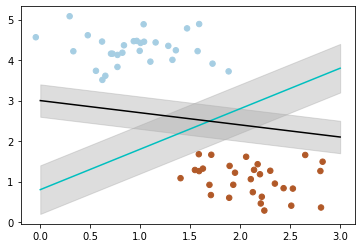

In [9]:
### 加粗线段查看对应间隔
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

x_fit = np.linspace(0, 3)

# 画函数
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
# 画边距
plt.fill_between(x_fit, y_1 - 0.6, y_1 + 0.6, edgecolor='none', color='#AAAAAA', alpha=0.4)

y_2 = -0.3 * x_fit + 3
plt.plot(x_fit, y_2, '-k')
plt.fill_between(x_fit, y_2 - 0.4, y_2 + 0.4, edgecolor='none', color='#AAAAAA', alpha=0.4)


### 暂时选择蓝色最为分类器，但是不一定是最优，所以引入SVM。

In [10]:
from sklearn.svm import SVC
# SVM 函数
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [11]:
# 最佳函数
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]

# 最大边距 下届
b_down = clf.support_vectors_[0]
y_down = a* x_fit + b_down[1] - a * b_down[0]
# 最大边距 上届
b_up = clf.support_vectors_[-1]
y_up = a* x_fit + b_up[1] - a * b_up[0]

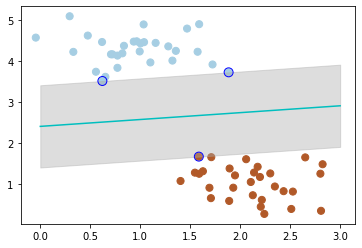

In [12]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 画函数
plt.plot(x_fit, y_3, '-c')
# 画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none', color='#AAAAAA', alpha=0.4)
# 画支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none')

带黑边的点是距离当前分类器最近的点，我们称之为支持向量。

支持向量机为我们提供了在众多可能的分类器之间进行选择的原则，从而确保对未知数据集具有更高的泛化性。

### 软间隔（个别点混在间隔带中）

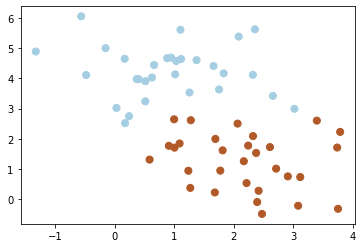

In [13]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

如果没有一个原则进行约束，满足软间隔的分类器也会出现很多条。

所以需要对分错的数据进行惩罚，SVC 函数中，有一个参数 C 就是惩罚参数。

惩罚参数越小，容忍性就越大。

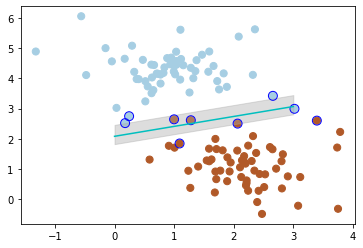

In [14]:
### 以c = 1为例
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 惩罚参数：C=1 
clf = SVC(C=1, kernel='linear')
clf.fit(X, y)

# 最佳函数
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]
# 最大边距 下届
b_down = clf.support_vectors_[0]
y_down = a* x_fit + b_down[1] - a * b_down[0]
# 最大边距 上届
b_up = clf.support_vectors_[-1]
y_up = a* x_fit + b_up[1] - a * b_up[0]

# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 画函数
plt.plot(x_fit, y_3, '-c')
# 画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none', color='#AAAAAA', alpha=0.4)
# 画支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none')

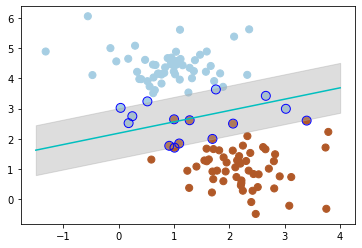

In [15]:
###惩罚参数 C=0.2 时，SVM 会更具包容性，从而兼容更多的错分样本：
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 惩罚参数：C=0.2 
clf = SVC(C=0.2, kernel='linear')
clf.fit(X, y)

x_fit = np.linspace(-1.5, 4)
# 最佳函数
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]
# 最大边距 下届
b_down = clf.support_vectors_[10]
y_down = a* x_fit + b_down[1] - a * b_down[0]
# 最大边距 上届
b_up = clf.support_vectors_[1]
y_up = a* x_fit + b_up[1] - a * b_up[0]

# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 画函数
plt.plot(x_fit, y_3, '-c')
# 画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none', color='#AAAAAA', alpha=0.4)
# 画支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none')

### 超平面（非线性分类，映射到高维空间）

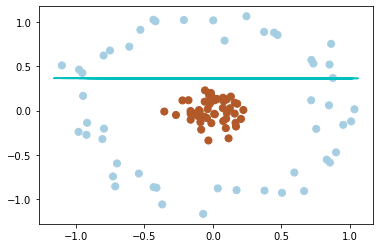

In [16]:
from sklearn.datasets.samples_generator import make_circles
# 画散点图
X, y = make_circles(100, factor=.1, noise=.1, random_state=2019)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

clf = SVC(kernel='linear').fit(X, y)

# 最佳函数
x_fit = np.linspace(-1.5, 1.5)
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*X - (clf.intercept_[0]) / w[1]

plt.plot(X, y_3, '-c')

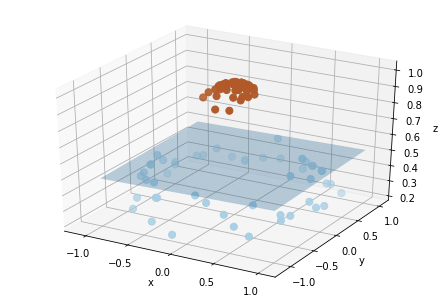

In [17]:
# 数据映射
from mpl_toolkits.mplot3d import Axes3D
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Paired)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_1, y_1 = np.meshgrid(np.linspace(-1, 1), np.linspace(-1, 1))
z =  0.01*x_1 + 0.01*y_1 + 0.5
ax.plot_surface(x_1, y_1, z, alpha=0.3)

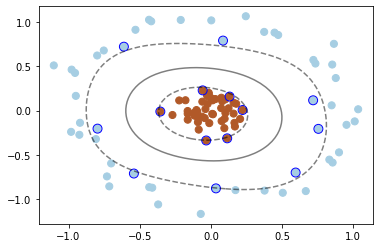

In [18]:
###在 SVC 中可以用高斯核函数来实现这以功能：kernel='rbf'
X, y = make_circles(100, factor=.1, noise=.1, random_state=2019)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
clf = SVC(kernel='rbf')
clf.fit(X, y)


ax = plt.gca()
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
x_1, y_1 = np.meshgrid(x, y)
P = np.zeros_like(x_1)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        P[i, j] = clf.decision_function(np.array([[xi, yj]]))
ax.contour(x_1, y_1, P, colors='k', levels=[-1, 0, 0.9], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none');